In [ ]:
import pandas as pd                       
import numpy as np                        
import matplotlib.pyplot as plt           
import seaborn as sns                     
from sklearn import metrics
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

**Nhập tập dữ liệu**

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

**Phân tích đơn biến**

In [ ]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Text(0.5, 1.0, 'Loan Status')

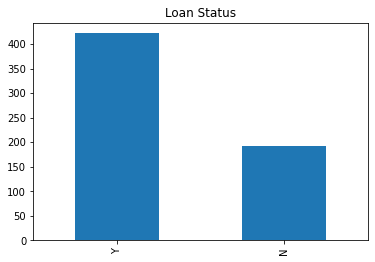

In [ ]:
train['Loan_Status'].value_counts().plot.bar() 
plt.title("Loan Status")

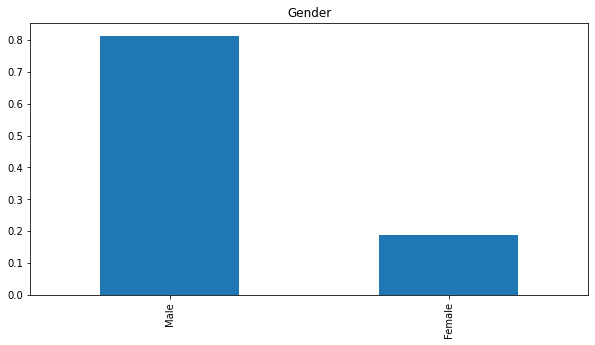

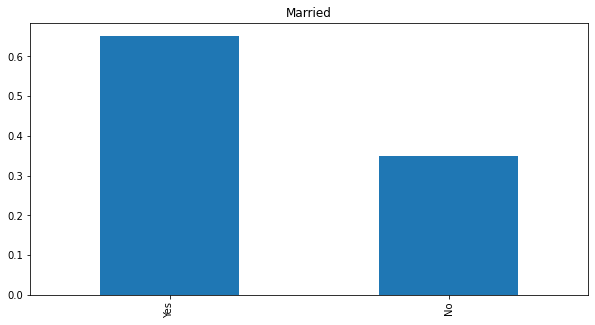

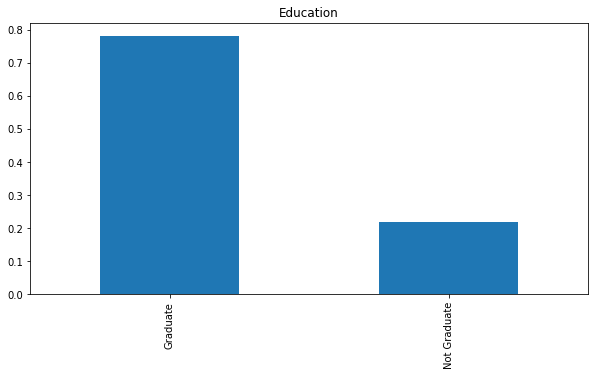

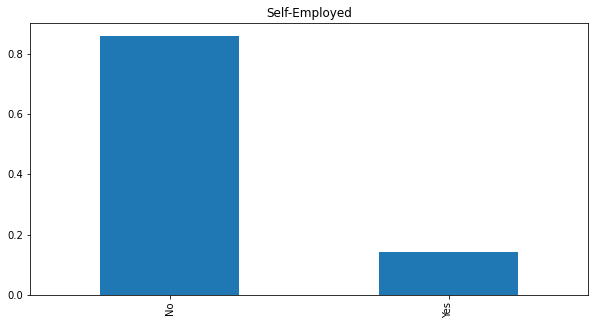

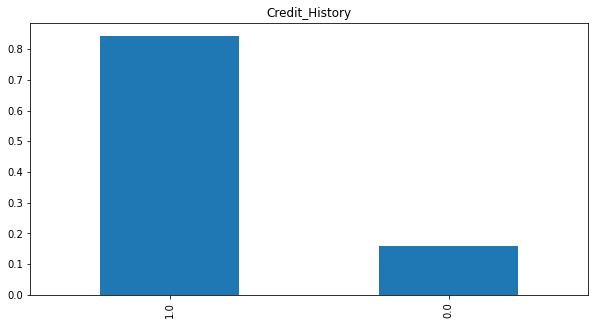

In [ ]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Married')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Education')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Self-Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Credit_History')
plt.show()


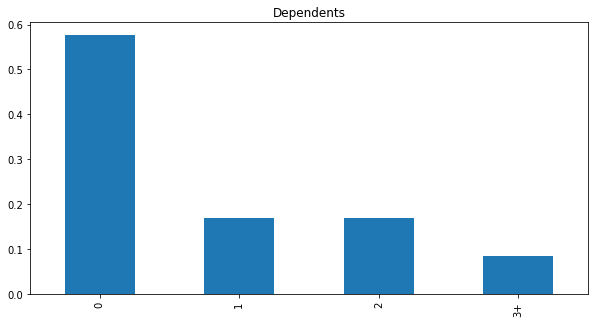

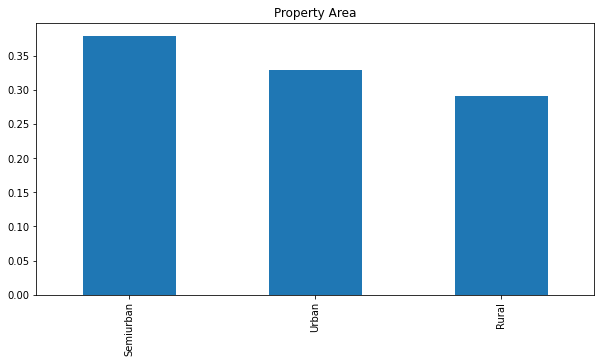

In [ ]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Dependents')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Property Area')
plt.show()

Người nộp đơn

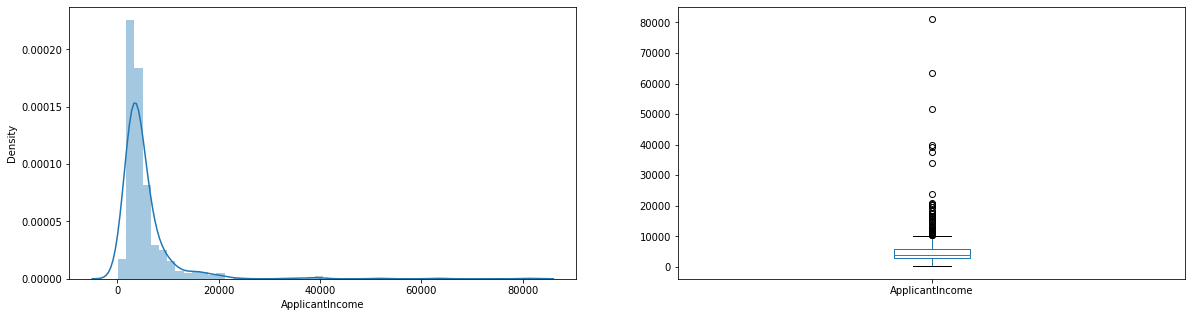

In [ ]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(20,5))

Text(0.5, 0.98, '')

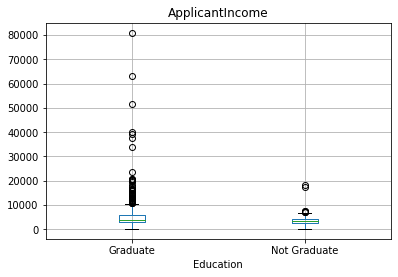

In [ ]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

Thu nhập người nộp đơn

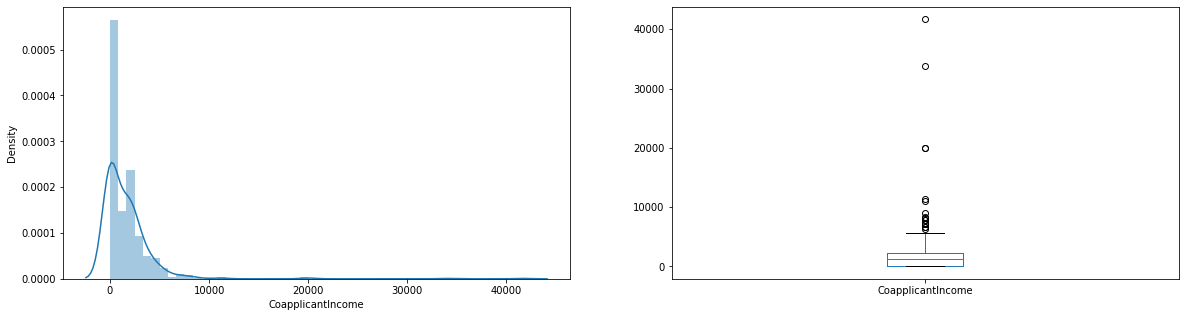

In [ ]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(20,5))

Khoản vay

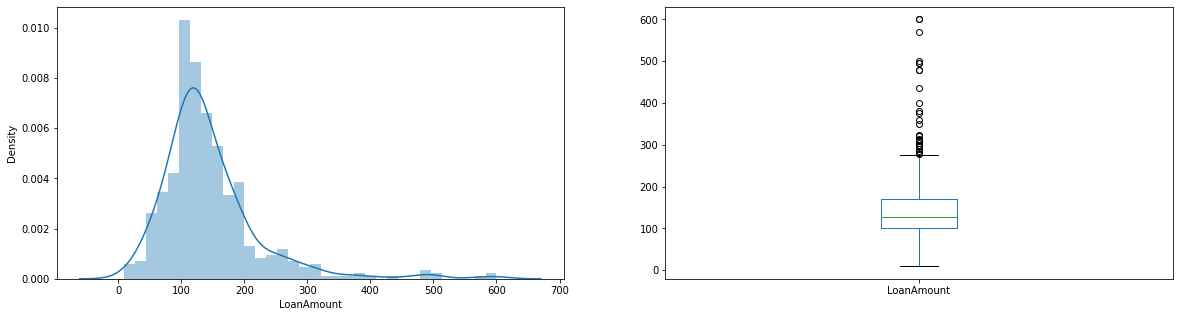

In [ ]:
df=train.dropna()
plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(20,5))

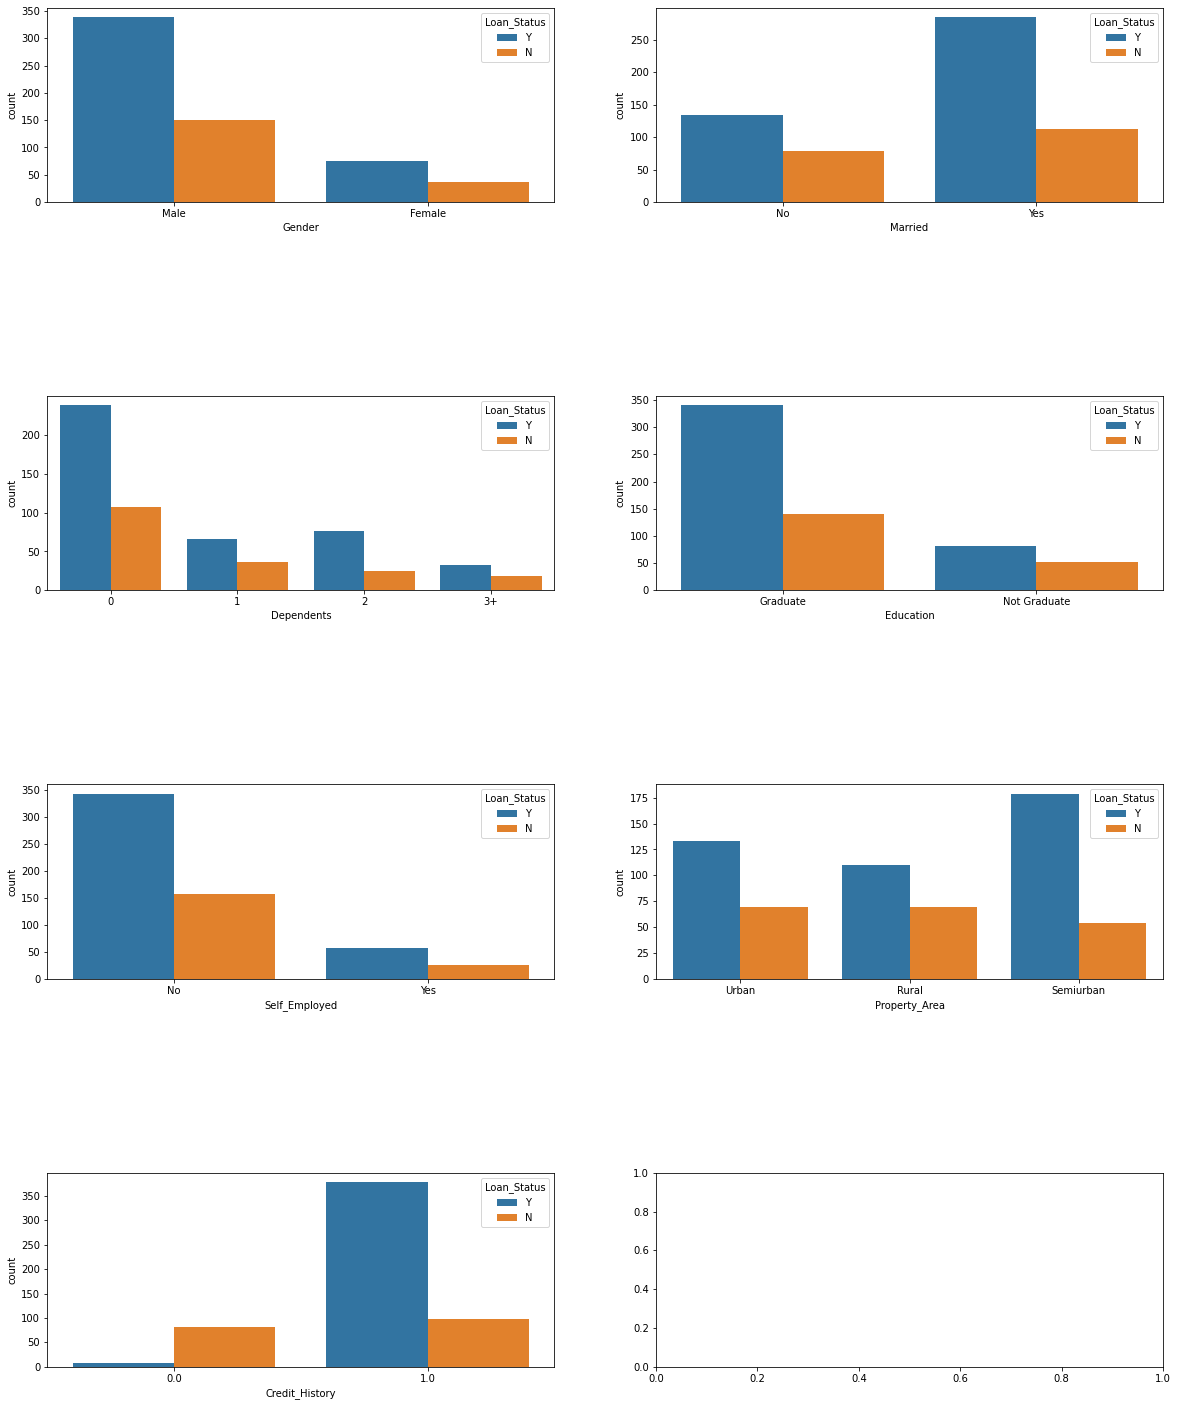

In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History']
fig,axes = plt.subplots(4,2,figsize=(20,25))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

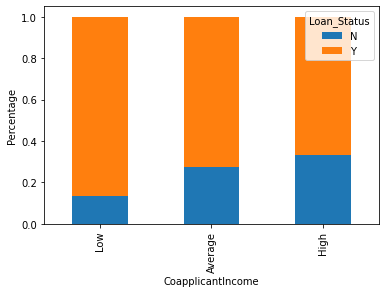

In [ ]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

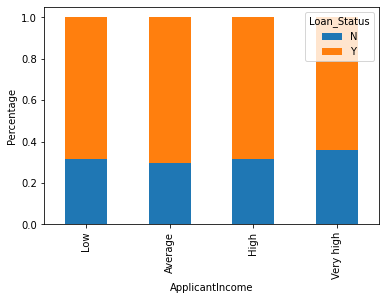

In [ ]:
bins=[0,2500,4000,6000,8100] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P=plt.ylabel('Percentage')

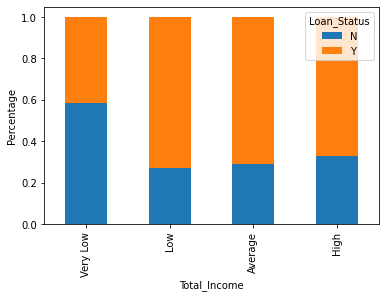

In [ ]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Very Low','Low','Average', 'High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

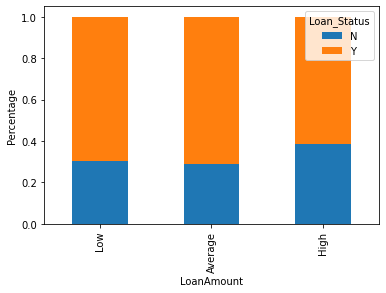

In [ ]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [ ]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant_Income_bin,Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,High,5849.0,Average,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Average,High,6091.0,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN,Average,3000.0,Low,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,NaN,High,6000.0,Average,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,NaN,Average,2900.0,Low,Low
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,NaN,High,4106.0,Average,Low
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Low,Very high,8312.0,High,High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,NaN,Very high,7583.0,High,Average


In [ ]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [ ]:
train['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

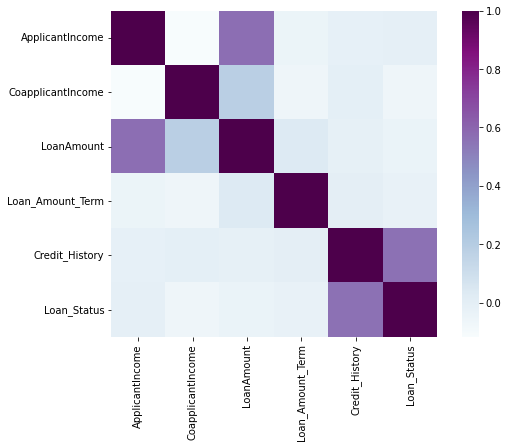

In [ ]:
matrix = train.corr() 
plt.figure(figsize=(9,6))
sns.heatmap(matrix, square=True, cmap="BuPu")

**Tiền xử lý dữ liệu**

In [ ]:
train.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [ ]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [ ]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

**Training**

In [ ]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis= 1)

In [ ]:
x = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [ ]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size = 0.2)

**Logistic Regression** 

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred_cv = model.predict(x_cv)

In [ ]:
accuracy_score(y_cv,pred_cv)

0.7967479674796748

**K-Fold**

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
i=1 
pred_scores=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]
    pred_scores.append(score)
print("\nMean of Accuracy Scores=",mean(pred_scores))



1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8211382113821138

5 of kfold 5
accuracy_score 0.8032786885245902

Mean of Accuracy Scores= 0.8126882580301213


In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(SVC(gamma = 'auto'),{
    'C' : [1, 10, 20],
    'kernel' : ['rbf', 'linear']
}, cv = 5, return_train_score=False)
gs.fit(x_train, y_train)
gs.cv_results_

{'mean_fit_time': array([1.33328915e-02, 1.20359541e+02, 1.47103786e-02, 1.82952596e+02,
        1.27876282e-02, 1.73307594e+02]),
 'mean_score_time': array([0.00529394, 0.00355258, 0.0059639 , 0.00337334, 0.00494852,
        0.00330749]),
 'mean_test_score': array([0.68839415, 0.77400536, 0.68839415, 0.76990311, 0.68839415,
        0.78214801]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],
 'rank_test_score': array([4, 2, 4, 3, 4, 1], dtype=int32),
 'split0_test_score':

In [ ]:
df = pd.DataFrame(gs.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013333,0.000711,0.005294,0.000172,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.686869,0.683673,0.683673,0.693878,0.693878,0.688394,0.004627,4
1,120.359541,59.819455,0.003553,0.000206,1,linear,"{'C': 1, 'kernel': 'linear'}",0.737374,0.755102,0.826531,0.795918,0.755102,0.774005,0.032544,2
2,0.014710,0.002526,0.005964,0.001309,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.686869,0.683673,0.683673,0.693878,0.693878,0.688394,0.004627,4
3,182.952596,42.124903,0.003373,0.000108,10,linear,"{'C': 10, 'kernel': 'linear'}",0.747475,0.785714,0.816327,0.806122,0.693878,0.769903,0.044721,3
4,0.012788,0.000185,0.004949,0.000030,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.686869,0.683673,0.683673,0.693878,0.693878,0.688394,0.004627,4
5,173.307594,105.138882,0.003307,0.000158,20,linear,"{'C': 20, 'kernel': 'linear'}",0.747475,0.785714,0.826531,0.785714,0.765306,0.782148,0.026386,1


In [ ]:
df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.688394
1,1,linear,0.774005
2,10,rbf,0.688394
3,10,linear,0.769903
4,20,rbf,0.688394
5,20,linear,0.782148


In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20],
            'max_depth' : [1,3,5,7,9,11]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }
    }     
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    gs =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    gs.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.782148,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.816718,"{'max_depth': 3, 'n_estimators': 20}"
2,logistic_regression,0.812637,{'C': 1}
3,decision_tree,0.700680,{'criterion': 'entropy'}
